In [89]:
import pandas as pd 
from translate import Translator
import re 
import matplotlib.pyplot as plt


In [ ]:
#get all the dataframes from the csv files
'''child_mortality = pd.read_csv('R_1_0_G_1/R_1_0_G_1_child_mortality.csv')
highschool = pd.read_csv('R_1_0_G_1/R_1_0_G_1_high_school.csv')
elementary = pd.read_csv('R_1_0_G_1/R_1_0_G_1_elementary_school.csv')# data from individuals aged 11 - 21
classroom = pd.read_csv('R_1_0_G_1/R_1_0_G_1_classroom.csv') # data from 11 - 21 (focuses on classroom environment, e.g: ethnicity of student, etc...)
students = pd.read_csv('R_1_0_G_1/R_1_0_G_1_students.csv') # data from 21-35
perinatal = pd.read_csv('R_1_0_G_1/R_1_0_G_1_perinatal.csv')# data from 0-8
'''
main = pd.read_csv('R_1_0_G_1/R_1_0_G_1_main.csv')


C:\Users\cleme\AppData\Local\Temp\ipykernel_28840\3609379407.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  main = pd.read_csv('R_1_0_G_1/R_1_0_G_1_main.csv')


In [91]:
#lets look at the main df for example (data on adults)




#translate the columns first
t = Translator(from_lang="nl", to_lang="en")
main.columns = [
    t.translate(col).strip().lower().replace(" ", "_")
    for col in main.columns
]


display(main.head())

# ---- Basic overview ----
overview = pd.DataFrame({
    "column": main.columns,
    "dtype": [str(main[c].dtype) for c in main.columns],
    "missing_n": [main[c].isna().sum() for c in main.columns],
    "missing_%": [round(main[c].isna().mean()*100, 2) for c in main.columns],
    "n_unique": [main[c].nunique(dropna=True) for c in main.columns],
})
display(overview)

print("Unique values in 'parent income wealth bins':", main['parent_income_wealth_bins'].unique())
print("Unique values in 'migration background':", main['migration_background'].unique())
print("Unique values in 'household composition':", main['household'].unique()) # whether the household is a single parent household, etc...

print("Unique values in 'outcome':", main['outcome'].unique()) # outcome is target variable, there are a lot here mostly health, and income related outcomes

display(main['type'])


,unnamed:_0,geography,sex,migration_background,household,parent_income_wealth_bins,outcome,n,mean,parents_income,education_parents,type
0,1,Voorne aan Zee,Totaal,Totaal,Totaal,0% - 20%,c30_age_left_parents,816,22.8,34.718,Totaal,5_income
1,2,Voorne aan Zee,Totaal,Totaal,Totaal,20% - 40%,c30_age_left_parents,816,23.3,68.950,Totaal,5_income
2,3,Voorne aan Zee,Totaal,Totaal,Totaal,40% - 60%,c30_age_left_parents,816,23.7,91.888,Totaal,5_income
3,4,Voorne aan Zee,Totaal,Totaal,Totaal,60% - 80%,c30_age_left_parents,816,23.3,116.697,Totaal,5_income
4,5,Voorne aan Zee,Totaal,Totaal,Totaal,80% - 100%,c30_age_left_parents,816,22.6,175.776,Totaal,5_income


,column,dtype,missing_n,missing_%,n_unique
0,unnamed:_0,int64,0,0.0,5409052
1,geography,object,0,0.0,3276
2,sex,object,0,0.0,3
3,migration_background,object,0,0.0,7
4,household,object,0,0.0,3
5,parent_income_wealth_bins,object,0,0.0,36
6,outcome,object,0,0.0,26
7,n,int64,0,0.0,2945
8,mean,float64,0,0.0,752101
9,parents_income,float64,0,0.0,128661


Unique values in 'parent income wealth bins': ['0% - 20%' '20% - 40%' '40% - 60%' '60% - 80%' '80% - 100%' '0% - 10%'
 '10% - 20%' '20% - 30%' '30% - 40%' '40% - 50%' '50% - 60%' '60% - 70%'
 '70% - 80%' '80% - 90%' '90% - 100%' '0% - 5%' '5% - 10%' '10% - 15%'
 '15% - 20%' '20% - 25%' '25% - 30%' '30% - 35%' '35% - 40%' '40% - 45%'
 '45% - 50%' '50% - 55%' '55% - 60%' '60% - 65%' '65% - 70%' '70% - 75%'
 '75% - 80%' '80% - 85%' '85% - 90%' '90% - 95%' '95% - 100%' 'Totaal']
Unique values in 'migration background': ['Totaal' 'Wel migratieachtergrond' 'Turkije' 'Marokko' 'Suriname'
 'Zonder migratieachtergrond' 'Nederlandse Cariben']
Unique values in 'household composition': ['Totaal' 'Eenoudergezin' 'Tweeoudergezin']
Unique values in 'outcome': ['c30_age_left_parents' 'c30_basic_mhc' 'c30_debt' 'c30_disability'
 'c30_employed' 'c30_gifts_received' 'c30_hbo_attained' 'c30_home_wealth'
 'c30_homeowner' 'c30_hospital' 'c30_hourly_wage' 'c30_hourly_wage_max_11'
 'c30_hourly_wage_max_14' 'c

0          5_income
1          5_income
2          5_income
3          5_income
4          5_income
             ...   
5409047    1_income
5409048    1_income
5409049    1_income
5409050    1_income
5409051    1_income
Name: type, Length: 5409052, dtype: object

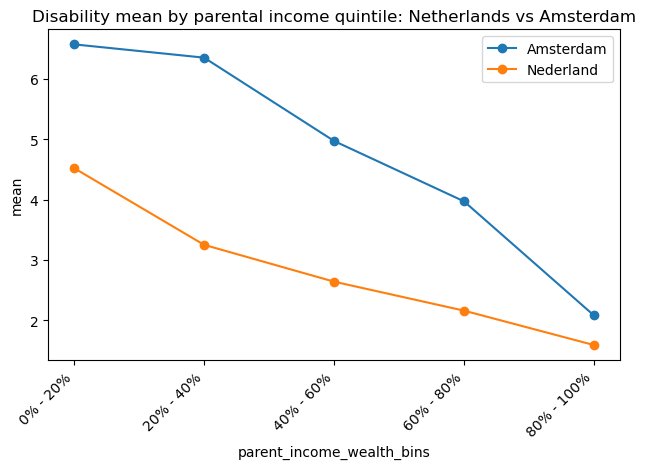

In [117]:
#use this function to filter the df and look at specific slices of the data
# e.g filter_df(main, type="5_income", migration_background="Totaal", gender='female')



def filter_df(d, **kwargs):
    out = d.copy()
    for k, v in kwargs.items():
        out = out[out[k] == v]
    return out

# Base filters for the 'total' slice
base_filters = dict(
    migration_background="Totaal",
    sex="Totaal",
    household="Totaal",
    education_parents="Totaal"
)


# create numeric values for the income bins for plotting purposes
# e.g "0-20%" -> 20, "20-40%" -> 40, "40-60%" -> 60, "60-80%" -> 80, "80-100%" -> 100
def bin_sort_key(s):
    m = re.search(r"(-?\d+)\s*%?", str(s))
    return int(m.group(1)) if m else 10_000


# Netherlands vs Amsterdam by income quintile (5_income) 
# 5_income (type) means the data is split by 5 income bins (0-20%, 20-40%, 40-60%, 60-80%, 80-100%)

# for this example we are looking at the disability outcome (c30_disability) across the income bins, 
# we compare Amsterdam with the rest of the netherlands
# The disability means, according to the github repository is how likely someone is to have a disability at age 30 in a given population

filtered = filter_df(main, type="5_income", outcome='c30_disability', **base_filters)
ams = filtered[filtered["geography"].isin(["Nederland", "Amsterdam"])].copy()
ams["bin_key"] = ams["parent_income_wealth_bins"].map(bin_sort_key)
ams = ams.sort_values(["geography", "bin_key"])

piv = ams.pivot_table(index="parent_income_wealth_bins", columns="geography", values="mean", aggfunc="mean")
ordered_bins = sorted(ams["parent_income_wealth_bins"].unique(), key=bin_sort_key)
piv = piv.loc[ordered_bins]

plt.figure()
for col in piv.columns:
    plt.plot(range(len(piv.index)), piv[col].values, marker="o", label=col)
plt.xticks(range(len(piv.index)), piv.index, rotation=45, ha="right")
plt.xlabel("parent_income_wealth_bins")
plt.ylabel("mean")
plt.title("Disability mean by parental income quintile: Netherlands vs Amsterdam")
plt.legend()
plt.tight_layout()
plt.show()

In [93]:
#IMPORTANT FOR LATER ANALAYSIS: 
#Use the filter_df(df, type="5_income", gender="whatever", ...)



In [114]:

#just to check sample sizes in the data

df = filter_df(main, **base_filters, outcome='c30_disability')
filtered = df[df["geography"] != "Nederland"].copy()
sample_pop = filtered[filtered["n"] >= 2000].sort_values("n", ascending=False)

top10 = sample_pop.head(10)[["geography", "n", "parents_income", "mean"]]
bottom10 = sample_pop.tail(10)[["geography", "n", "parents_income", "mean"]]

display(top10)
display(bottom10)

print('average sample size across geographies:', sample_pop['n'].mean()) # average sample size

# we can see that amsterdam has highest sample population
# we have some postcodes also, with the lowest sample sizes, around 2000




,geography,n,parents_income,mean
4514245,Amsterdam,27857,63.224,4.79
4513601,Rotterdam,27508,67.525,3.42
4513491,'s-Gravenhage,19727,72.888,3.73
4513184,Utrecht,9317,69.938,5.44
4513321,Tilburg,8926,80.213,3.63
4514165,Eindhoven,8425,83.276,3.99
4512791,Apeldoorn,8325,88.070,2.57
4513154,Almere,8126,88.155,3.24
4512088,Groningen,7420,83.340,2.57
4512457,Zoetermeer,7233,101.131,2.41


,geography,n,parents_income,mean
1916283,319X,2049,77.039,2.34
4511855,Tiel,2024,82.313,2.82
4511840,Geldrop-Mierlo,2024,88.039,2.87
4512269,Rheden,2024,91.071,3.41
1917511,621X,2019,82.956,5.99
1917337,575X,2018,79.248,2.82
4513827,Deurne,2018,79.248,2.82
1916558,375X,2013,87.284,1.94
4513554,Coevorden,2010,79.279,3.18
1916232,311X,2001,69.345,3.75


average sample size across geographies: 3636.188811188811


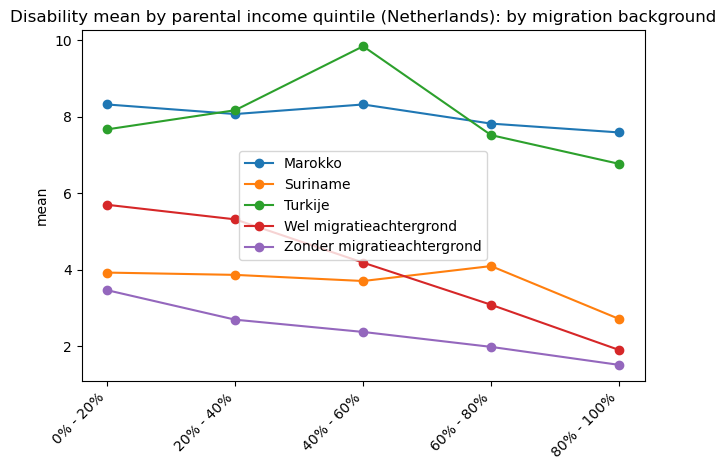

In [ ]:
# Migration background vs income quintile (Netherlands, 5_income)

base_filters = dict(
    sex="Totaal",
    household="Totaal",
    education_parents="Totaal"
)
migration = filter_df(main, type="5_income", **base_filters, outcome='c30_disability')
d5_mig = migration[migration["geography"] == "Nederland"].copy()


keep_mig = ["Zonder migratieachtergrond", "Wel migratieachtergrond", "Marokko", "Turkije", "Suriname"]
d5_mig = d5_mig[d5_mig["migration_background"].isin(keep_mig)].copy()



d5_mig["bin_key"] = d5_mig["parent_income_wealth_bins"].map(bin_sort_key)
piv_mig = d5_mig.pivot_table(
    index="parent_income_wealth_bins",
    columns="migration_background",
    values="mean",
    aggfunc="mean"
)
piv_mig = piv_mig.loc[sorted(piv_mig.index, key=bin_sort_key)]

plt.figure()
for col in piv_mig.columns:
    plt.plot(range(len(piv_mig.index)), piv_mig[col].values, marker="o", label=col)
plt.xticks(range(len(piv_mig.index)), piv_mig.index, rotation=45, ha="right")
plt.ylabel("mean")
plt.title("Disability mean by parental income quintile (Netherlands): by migration background")
plt.legend()
plt.tight_layout()
plt.show()

,unnamed:_0,geography,sex,migration_background,household,parent_income_wealth_bins,outcome,n,mean,parents_income,education_parents,type
1899749,1899750,Voorne aan Zee,Totaal,Totaal,Totaal,Totaal,c30_disability,4080,2.43,97.606,Totaal,1_income
1899760,1899761,Nederland,Totaal,Totaal,Totaal,Totaal,c30_disability,828097,2.83,83.915,Totaal,1_income
1915091,1915092,101X,Totaal,Totaal,Totaal,Totaal,c30_disability,2168,4.11,70.182,Totaal,1_income
1915108,1915109,102X,Totaal,Totaal,Totaal,Totaal,c30_disability,1785,4.87,63.349,Totaal,1_income
1915122,1915123,103X,Totaal,Totaal,Totaal,Totaal,c30_disability,1976,5.11,65.888,Totaal,1_income



Correlation (parents_income vs mean) across geographies: -0.5196428499666718


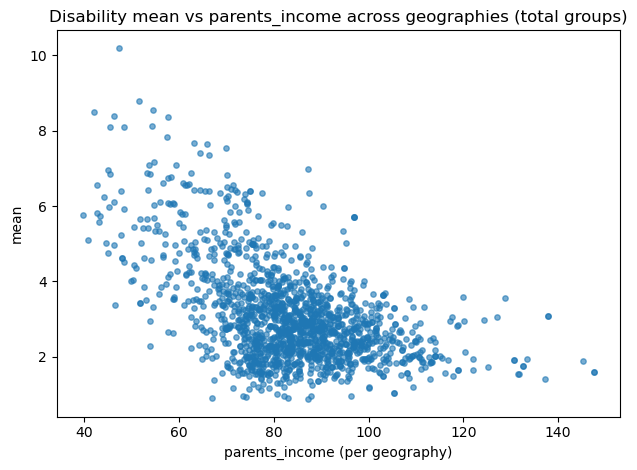


Top 10 geographies by mean (N>=2000):
               geography      n  parents_income  mean
4512066  Sittard-Geleen   4483          81.436  5.51
4512600        Kerkrade   2249          69.948  5.51
4512203      Maastricht   4737          79.334  5.51
4513184         Utrecht   9317          69.938  5.44
4513454         Heerlen   4490          73.039  5.14
4511949       Landgraaf   2181          75.677  5.00
4513254         Helmond   4052          75.316  4.99
4512513        Roermond   2643          72.448  4.96
4512923          Almelo   3951          72.358  4.88
4514245       Amsterdam  27857          63.224  4.79

Bottom 10 geographies by mean (N>=2000):
                    geography     n  parents_income  mean
4512975      Noordoostpolder  2893          77.469  1.66
4512837     De Fryske Marren  3004          76.100  1.63
4512860           Hardenberg  3836          74.411  1.62
4511702      Súdwest-Fryslân  5389          73.750  1.56
4511767    Noardeast-Fryslân  3083          69.04

In [118]:
# looking at disability mean vs parents_income across geographies (total groups)

filtered_df = filter_df(main, type="1_income", **base_filters, parent_income_wealth_bins="Totaal", outcome='c30_disability')
ams = filtered[filtered["geography"].isin(["Nederland", "Amsterdam"])].copy()
ams["bin_key"] = ams["parent_income_wealth_bins"].map(bin_sort_key)
ams = ams.sort_values(["geography", "bin_key"])
display(filtered_df.head())

filtered = filtered_df[filtered_df["geography"] != "Nederland"].copy()
corr = filtered[["parents_income", "mean"]].corr().iloc[0, 1]
print("\nCorrelation (parents_income vs mean) across geographies:", corr)
plt.figure()
plt.scatter(filtered["parents_income"], filtered["mean"], s=15, alpha=0.6)
plt.xlabel("parents_income (per geography)")
plt.ylabel("mean")
plt.title("Disability mean vs parents_income across geographies (total groups)")
plt.tight_layout()
plt.show()

# we then print a nice table with the top 10 and bottom geographies with the highest and lowest disability means

geo_total_cleanname = filtered[filtered["geography"].astype(str).str.match(r"^[A-Za-zÀ-ÿ'’\-\s\.]+$")].copy()
geo_rank = geo_total_cleanname[geo_total_cleanname["n"] >= 2000].sort_values("mean", ascending=False)

top10 = geo_rank.head(10)[["geography", "n", "parents_income", "mean"]]
bottom10 = geo_rank.tail(10)[["geography", "n", "parents_income", "mean"]]

print("\nTop 10 geographies by mean (N>=2000):\n", top10)
print("\nBottom 10 geographies by mean (N>=2000):\n", bottom10)